In [ ]:
!pip install mediapipe opencv-python numpy matplotlib --upgrade


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
orbax-checkpoint 0.11.12 requires jax>=0.5.0, but you have jax 0.4.30 which is incompatible.


In [ ]:
!pip install --upgrade numpy==1.23.5 mediapipe opencv-python matplotlib



  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 re

Image Upload + Face Landmark Detection

Saving sid_realtime.jpg to sid_realtime.jpg
📸 Image uploaded: sid_realtime.jpg


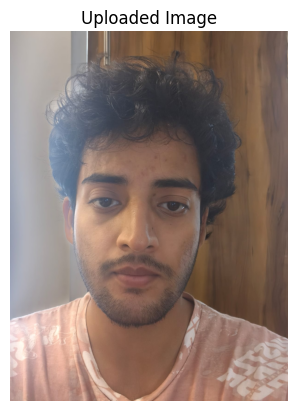

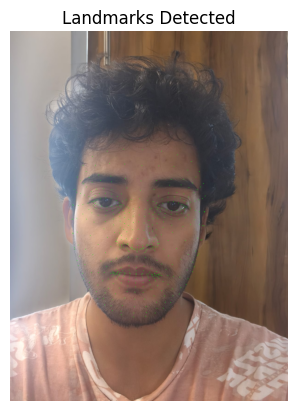

In [ ]:
from google.colab import files
from IPython.display import Image, display
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# Upload image
uploaded = files.upload()

# Get uploaded file path
image_path = next(iter(uploaded))
print(f"📸 Image uploaded: {image_path}")

# Load and display image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image could not be read. Please upload a valid image.")

# Convert BGR to RGB for display and Mediapipe
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Uploaded Image")
plt.show()

# Initialize Mediapipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
with mp_face_mesh.FaceMesh(static_image_mode=True,
                           max_num_faces=1,
                           min_detection_confidence=0.5) as face_mesh:

    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                h, w, _ = image.shape
                x, y = int(landmark.x * w), int(landmark.y * h)
                cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

    # Show landmarks
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Landmarks Detected")
    plt.show()


Video Upload + Landmark Extraction

Saving Untitled video - Made with Clipchamp.mp4 to Untitled video - Made with Clipchamp.mp4
🎥 Video uploaded: Untitled video - Made with Clipchamp.mp4


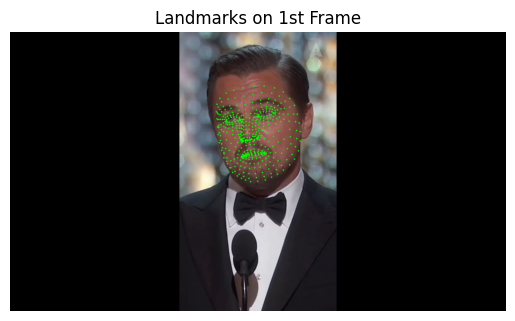

✅ Processed 360 frames with landmark detection.


In [ ]:
from google.colab import files
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Upload video
uploaded_video = files.upload()

# Get video path
video_path = next(iter(uploaded_video))
print(f"🎥 Video uploaded: {video_path}")

# Initialize Mediapipe face mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh_video = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Open video
cap = cv2.VideoCapture(video_path)
frame_landmarks = []

frame_count = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    frame_count += 1
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh_video.process(rgb_frame)

    frame_points = []

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                h, w, _ = frame.shape
                x, y = int(landmark.x * w), int(landmark.y * h)
                frame_points.append((x, y))
                # Optional: draw landmark
                cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    frame_landmarks.append(frame_points)

    # Optional: visualize only a few frames
    if frame_count == 1:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Landmarks on 1st Frame")
        plt.show()

cap.release()
print(f"✅ Processed {frame_count} frames with landmark detection.")


Face Swapping

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
orbax-checkpoint 0.11.12 requires jax>=0.5.0, but you have jax 0.4.30 which is incompatible.


In [ ]:
pip install scikit-image


In [ ]:
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

def get_face_landmarks(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)
    if not results.multi_face_landmarks:
        return None
    h, w = image.shape[:2]
    landmarks = []
    for lm in results.multi_face_landmarks[0].landmark:
        x, y = int(lm.x * w), int(lm.y * h)
        landmarks.append((x, y))
    return landmarks

def apply_affine_transform(src, src_tri, dst_tri, size):
    warp_mat = cv2.getAffineTransform(np.float32(src_tri), np.float32(dst_tri))
    dst = cv2.warpAffine(src, warp_mat, size, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return dst

def warp_triangle(img1, img2, t1, t2):
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    t1_rect = [(pt[0] - r1[0], pt[1] - r1[1]) for pt in t1]
    t2_rect = [(pt[0] - r2[0], pt[1] - r2[1]) for pt in t2]

    mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(t2_rect), (1.0, 1.0, 1.0), 16, 0)

    img1_rect = img1[r1[1]:r1[1]+r1[3], r1[0]:r1[0]+r1[2]]
    size = (r2[2], r2[3])
    warped = apply_affine_transform(img1_rect, t1_rect, t2_rect, size)

    # Convert to uint8 before the blend
    img2_section = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]]
    img2_section = np.clip(img2_section.astype(np.float32) * (1 - mask), 0, 255).astype(np.uint8)
    warped_section = np.clip(warped.astype(np.float32) * mask, 0, 255).astype(np.uint8)

    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = cv2.add(img2_section, warped_section)

def get_triangles(points):
    rect = (0, 0, 600, 600)
    subdiv = cv2.Subdiv2D(rect)
    for p in points:
        subdiv.insert((float(p[0]), float(p[1])))

    triangles = []
    for t in subdiv.getTriangleList():
        pts = [(t[0], t[1]), (t[2], t[3]), (t[4], t[5])]
        indices = []
        for pt in pts:
            for i, point in enumerate(points):
                if abs(pt[0] - point[0]) < 1 and abs(pt[1] - point[1]) < 1:
                    indices.append(i)
                    break
        if len(indices) == 3:
            triangles.append(indices)
    return triangles

# Load static face image and extract landmarks
src_img = cv2.imread("sid_realtime.jpg")
src_img = cv2.resize(src_img, (600, 600))
src_points = get_face_landmarks(src_img)
if src_points is None:
    raise Exception("No face detected in source image.")

triangles = get_triangles(src_points)

# Open video
cap = cv2.VideoCapture("Untitled video - Made with Clipchamp.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter("output_faceswap.mp4", fourcc, fps, (w, h))

# Initialize Face Mesh for video (faster)
face_mesh_video = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    dst_points = get_face_landmarks(frame)
    if dst_points is None:
        out.write(frame)
        continue

    output = frame.copy()
    for tri in triangles:
        t1 = [src_points[i] for i in tri]
        t2 = [dst_points[i] for i in tri]
        warp_triangle(src_img, output, t1, t2)

    out.write(cv2.convertScaleAbs(output))

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
from google.colab import files
files.download('output_faceswap.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GAN TRAINING

1. Dataset

1.1 Kaggle Setup


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddhantroy2003","key":"ebd98ceb32b4ff7f12e3307fccf56a0c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

!unzip -oq celeba-dataset.zip -d celeba_dataset



Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
--


Preprocessing The CelebA Dataset

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os

class CelebADataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = sorted([
            fname for fname in os.listdir(image_dir)
            if fname.endswith('.jpg') or fname.endswith('.png')
        ])
        print(f"Total images found: {len(self.image_filenames)}")

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = CelebADataset(image_dir="/content/celeba_dataset/img_align_celeba/img_align_celeba", transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)


Total images found: 202599


In [ ]:
import os

root_path = "/content/celeba_dataset/img_align_celeba"

for root, dirs, files in os.walk(root_path):
    print(f"📁 {root}")
    for name in dirs:
        print(f"  📂 {name}")
    for name in files[:5]:
        print(f"  📄 {name}")
    break  # Only show top-level contents


📁 /content/celeba_dataset/img_align_celeba
  📂 faces


In [ ]:
import os

image_dir = "/content/celeba_dataset/img_align_celeba/img_align_celeba"
print("Number of image files found:", len(os.listdir(image_dir)))


Number of image files found: 202599


Defining Generator

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            # input: latent_dim x 1 x 1
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),  # 4x4
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),  # 8x8
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # 16x16
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),  # 32x32
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),  # 64x64
            nn.Tanh()  # output in range [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)


Defining Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # input: 3 x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),  # 32x32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),  # 16x16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),  # 8x8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),  # 4x4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),  # 1x1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)


Setup Training

->Imports and Device Setup

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


->Hyperparameters

In [ ]:
image_size = 64
batch_size = 128
latent_dim = 100
epochs = 50
lr = 0.0002
beta1 = 0.5


-> Data Preprocessing & Loader

In [ ]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

image_dir = "/content/celeba_dataset/img_align_celeba/img_align_celeba"
dataset = CelebADataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)


Total images found: 202599


-> Initialize Models

In [ ]:
netG = Generator(latent_dim).to(device)
netD = Discriminator().to(device)

# Weight initialization as per DCGAN paper
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

netG.apply(weights_init)
netD.apply(weights_init)


Discriminator(
  (disc): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

->Optimizers & Loss

In [ ]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


->Sample Noise Vector for Monitoring

In [ ]:
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)


TRAINING LOOP

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
from PIL import Image
import os
from tqdm import tqdm

# ---------------------- Custom Dataset ----------------------
class CelebADataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = sorted([
            fname for fname in os.listdir(image_dir)
            if fname.endswith('.jpg') or fname.endswith('.png')
        ])
        print(f"Total images found: {len(self.image_filenames)}")

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# ---------------------- Generator ----------------------
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 64*64*3),
            nn.Tanh()
        )

    def forward(self, z):
        out = self.model(z)
        return out.view(z.size(0), 3, 64, 64)

# ---------------------- Discriminator ----------------------
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64*64*3, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        out = img.view(img.size(0), -1)
        return self.model(out)

# ---------------------- Hyperparameters ----------------------
batch_size = 64
noise_dim = 100
lr = 0.0002
epochs = 5

# ---------------------- Transforms ----------------------
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ---------------------- Dataset and Dataloader ----------------------
image_dir = '/content/celeba_dataset/img_align_celeba/img_align_celeba'  # Change path if needed
dataset = CelebADataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# ---------------------- Model, Loss, Optimizers ----------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator(noise_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

os.makedirs('generated_images', exist_ok=True)

# ---------------------- Training Loop ----------------------
for epoch in range(epochs):
    progress = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
    for i, imgs in enumerate(progress):
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)

        # Real and fake labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # -------- Train Generator --------
        z = torch.randn(batch_size, noise_dim).to(device)
        fake_imgs = G(z)
        g_loss = criterion(D(fake_imgs), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # -------- Train Discriminator --------
        real_loss = criterion(D(real_imgs), real_labels)
        fake_loss = criterion(D(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        progress.set_postfix(D_Loss=d_loss.item(), G_Loss=g_loss.item())

    # Save generated samples after each epoch
    save_image(fake_imgs.data[:25], f"generated_images/fake_epoch_{epoch+1}.png", nrow=5, normalize=True)

print(" Training complete. Check `generated_images/` folder.")


Total images found: 202599


 Training complete. Check `generated_images/` folder.


In [ ]:
# Create a directory for saving models if not exists
import os
os.makedirs("saved_models", exist_ok=True)

# Save Generator and Discriminator weights
torch.save(G.state_dict(), "saved_models/generator_epoch5.pth")
torch.save(D.state_dict(), "saved_models/discriminator_epoch5.pth")
print("Models saved successfully.")


Models saved successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
torch.save(G.state_dict(), "saved_models/generator_epoch5.pth")
torch.save(D.state_dict(), "saved_models/discriminator_epoch5.pth")


In [ ]:
!cp saved_models/generator_epoch5.pth /content/drive/MyDrive/
!cp saved_models/discriminator_epoch5.pth /content/drive/MyDrive/


DETECTION

In [ ]:
!ls /content


drive  kaggle.json  sample_data


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s "face"


ref                                                    title                                             size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
andrewmvd/face-mask-detection                          Face Mask Detection                          416968083  2020-05-22 07:18:42.220000          91535       1837  0.875            
splcher/animefacedataset                               Anime Face Dataset                           413825766  2019-10-13 16:33:20.520000          37289        424  0.9375           
atulanandjha/lfwpeople                                 LFW - People (Face Recognition)              243503888  2019-11-15 19:45:43.120000          42054        454  1.0              
dataturks/face-detection-in-images                     Face Detection in Images      

In [ ]:
# Download and unzip the real vs fake face dataset
!kaggle datasets download -d ciplab/real-and-fake-face-detection
!unzip -q real-and-fake-face-detection.zip -d real_vs_fake_faces


Dataset URL: https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection
License(s): CC-BY-NC-SA-4.0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ciplab/real-and-fake-face-detection")

print("Path to dataset files:", path)

100%|██████████| 431M/431M [00:06<00:00, 66.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1


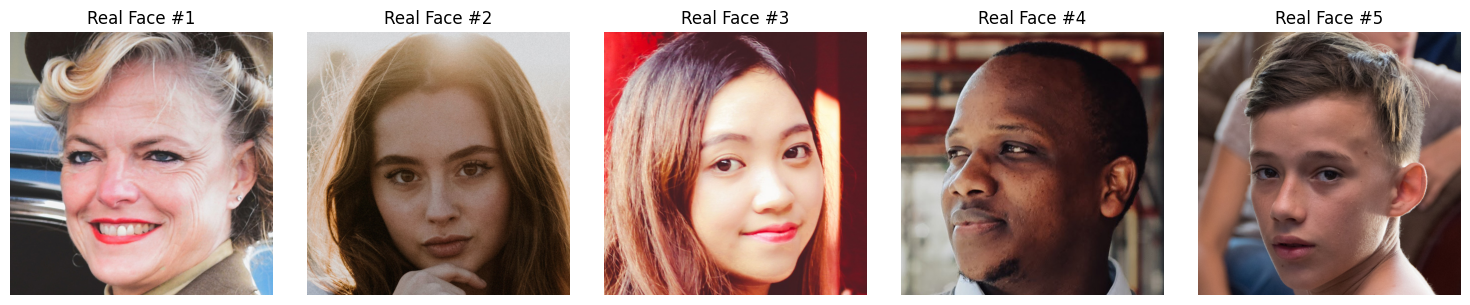

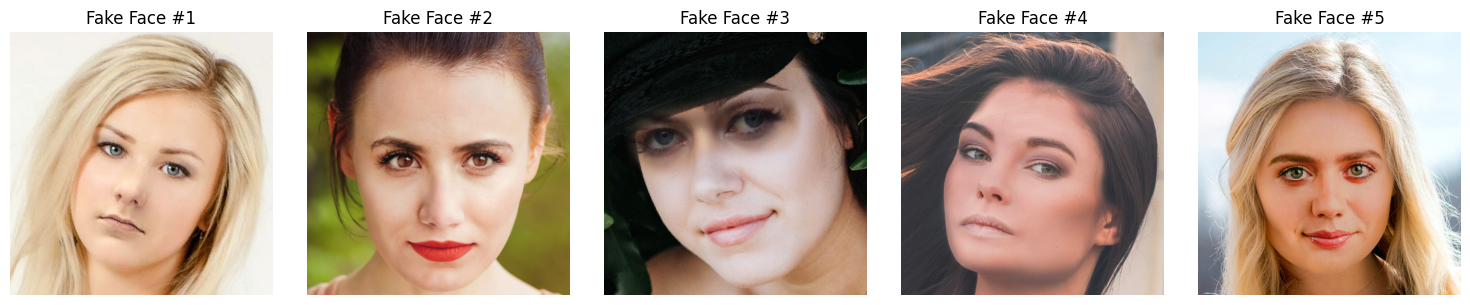

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1/real_and_fake_face"


import matplotlib.pyplot as plt
import cv2
import os

real_dir = os.path.join(dataset_path, "training_real")
fake_dir = os.path.join(dataset_path, "training_fake")

def show_images(image_paths, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, img_path in enumerate(image_paths[:n]):
        img = cv2.imread(img_path)[..., ::-1]  # Convert BGR to RGB
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{title} #{i+1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

real_images = [os.path.join(real_dir, f) for f in os.listdir(real_dir) if f.endswith(".jpg")]
fake_images = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if f.endswith(".jpg")]

show_images(real_images, "Real Face")
show_images(fake_images, "Fake Face")


In [ ]:
#Prepare the Dataset (Image Paths & Labels)
import pandas as pd

data = []

for img in os.listdir(real_dir):
    if img.endswith(".jpg"):
        data.append((os.path.join(real_dir, img), 1))  # Real = 1

for img in os.listdir(fake_dir):
    if img.endswith(".jpg"):
        data.append((os.path.join(fake_dir, img), 0))  # Fake = 0

df = pd.DataFrame(data, columns=["image_path", "label"])
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle
df.head()


,image_path,label
0,/root/.cache/kagglehub/datasets/ciplab/real-an...,1
1,/root/.cache/kagglehub/datasets/ciplab/real-an...,0
2,/root/.cache/kagglehub/datasets/ciplab/real-an...,0
3,/root/.cache/kagglehub/datasets/ciplab/real-an...,1
4,/root/.cache/kagglehub/datasets/ciplab/real-an...,0


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define transformation suitable for ResNet18 (or any other pretrained model)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Path to your dataset
data_dir = "/root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1/real_and_fake_face"

# Automatically labels real/fake using folder names
full_dataset = ImageFolder(root=data_dir, transform=transform)

# Split into train and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
#DataLoader with transforms for ResNet18

from torchvision import transforms
from torch.utils.data import DataLoader

# Transforms for pretrained ResNet (expects 224x224, normalized)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

# Apply to our dataset
train_dataset.transform = transform
val_dataset.transform = transform

# Create loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNet18
model = models.resnet18(pretrained=True)

# Freeze the early layers (optional: speeds up training & avoids overfitting on small data)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Original: nn.Linear(512, 1000)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)  # 2 classes: real and fake
)

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 115MB/s]


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


TRAINING CUSTOM RESNET

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


🚀 Using device: cpu

📚 Epoch 1/5


💾 Best model saved at epoch 1 with Val Accuracy: 0.5379

📊 Epoch 1 Results:
Train Loss: 0.6989 | Train Accuracy: 0.5251
Val   Loss: 0.6910 | Val   Accuracy: 0.5379

📚 Epoch 2/5


💾 Best model saved at epoch 2 with Val Accuracy: 0.5844

📊 Epoch 2 Results:
Train Loss: 0.6828 | Train Accuracy: 0.5521
Val   Loss: 0.6767 | Val   Accuracy: 0.5844

📚 Epoch 3/5


💾 Best model saved at epoch 3 with Val Accuracy: 0.5892

📊 Epoch 3 Results:
Train Loss: 0.6691 | Train Accuracy: 0.5901
Val   Loss: 0.6713 | Val   Accuracy: 0.5892

📚 Epoch 4/5


💾 Best model saved at epoch 4 with Val Accuracy: 0.6015

📊 Epoch 4 Results:
Train Loss: 0.6594 | Train Accuracy: 0.6066
Val   Loss: 0.6666 | Val   Accuracy: 0.6015

📚 Epoch 5/5


💾 Best model saved at epoch 5 with Val Accuracy: 0.6284

📊 Epoch 5 Results:
Train Loss: 0.6513 | Train Accuracy: 0.6195
Val   Loss: 0.6616 | Val   Accuracy: 0.6284


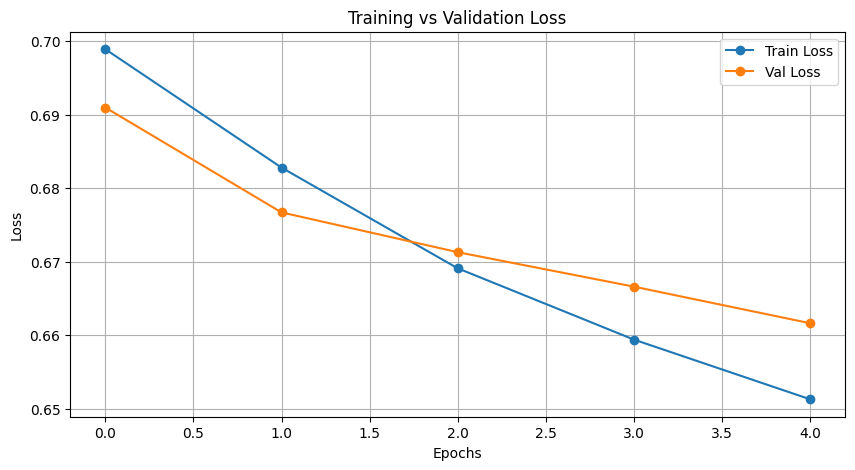

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🚀 Using device:", device)

# DataLoaders (assuming train_dataset and val_dataset are already defined)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model, Loss, Optimizer
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

# Training parameters
num_epochs = 5
best_val_acc = 0.0
train_losses, val_losses = [], []

# Output folder for checkpoints
os.makedirs("checkpoints", exist_ok=True)

# Training loop
for epoch in range(num_epochs):
    print(f"\n📚 Epoch {epoch+1}/{num_epochs}")

    # ------- Training -------
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for images, labels in tqdm(train_loader, desc="🔧 Training", leave=False):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)

    avg_train_loss = train_loss / train_total
    train_accuracy = train_correct / train_total
    train_losses.append(avg_train_loss)

    # ------- Validation -------
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="🧪 Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / val_total
    val_accuracy = val_correct / val_total
    val_losses.append(avg_val_loss)

    # Adjust learning rate
    scheduler.step(avg_val_loss)

    # Save model if validation accuracy improves
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), f"checkpoints/best_model_epoch{epoch+1}.pth")
        print(f"💾 Best model saved at epoch {epoch+1} with Val Accuracy: {val_accuracy:.4f}")

    # ------- Epoch Summary -------
    print(f"\n📊 Epoch {epoch+1} Results:")
    print(f"Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val   Loss: {avg_val_loss:.4f} | Val   Accuracy: {val_accuracy:.4f}")

# ------- 📉 Plot Losses -------
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Val Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()
